# CRIANDO O BANCO COM DADOS DA APi


Para começar, vamos criar o banco de dados "vacinados", utilizando os dados da API do data-set escolhido.


Dataset escolhido: http://dados.recife.pe.gov.br/dataset/perfil-das-pessoas-vacinadas-covid-19/resource/ca7fb968-3a2c-44ff-a2e8-730d1a689407

In [19]:
import requests
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


def create_vacinados_db():
    # URL da API
    url = f"http://dados.recife.pe.gov.br/api/3/action/datastore_search?&resource_id=ca7fb968-3a2c-44ff-a2e8-730d1a689407&limit=300000"

    # Fazer a requisição à API
    response = requests.get(url)
    data = response.json()

    if 'result' in data and 'records' in data['result']:
        vacinados = data['result']['records']
    else:
        print("Erro: Não foi possível obter os dados da API.")
        return


    # Criar ou conectar ao banco de dados SQLite
    conn = sqlite3.connect('vacinados.db')
    c = conn.cursor()

    # Criar a tabela, se não existir
    c.execute('''
    CREATE TABLE IF NOT EXISTS vacinados (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    faixa_etaria TEXT,
    idade NUMERIC,
    sexo TEXT,
    raca_cor TEXT,
    municipio TEXT,
    grupo TEXT,
    categoria TEXT,
    lote TEXT,
    vacina_fabricante TEXT,
    descricao_dose NUMERIC,
    cnes TEXT,
    sistema_origem TEXT,
    data_vacinacao TIMESTAMP
    );
    ''')



    # Inserir dados no banco de dados
    for vacina in vacinados:
        c.execute('''
        INSERT INTO vacinados (faixa_etaria, idade, sexo, raca_cor, municipio, grupo, categoria, lote, vacina_fabricante, descricao_dose, cnes, sistema_origem, data_vacinacao)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);
        ''', (
            vacina.get('faixa_etaria', ''),
            vacina.get('idade', 0),
            vacina.get('sexo', ''),
            vacina.get('raca_cor', ''),
            vacina.get('municipio', ''),
            vacina.get('grupo', ''),
            vacina.get('categoria', ''),
            vacina.get('lote', ''),
            vacina.get('vacina_fabricante', ''),
            vacina.get('descricao_dose', 0),
            vacina.get('cnes', ''),
            vacina.get('sistema_origem', ''),
            vacina.get('data_vacinacao', '')
        ))

    # Commitar as mudanças e fechar a conexão
    conn.commit()
    conn.close()

# Exemplo de uso chamando a função para criar com todos os registros da API
create_vacinados_db()




Agora vamos criar uma nova conexão com o banco de dados para fazermos consultas:

In [ ]:
connection = sqlite3.connect('vacinados.db')

# Criando uma variavel que recebe todo o valor da leitura
vc = pd.read_sql_query("select * from vacinados;", connection)
pd.read_sql_query("select * from vacinados;", connection)



Vamos começar nossa análise exploratória:

In [4]:
vc.info()
# um comando que vai dar as informações gerais da nossa base de dados, valores nulos e tipos de dados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 300000 non-null  int64  
 1   faixa_etaria       300000 non-null  object 
 2   idade              299999 non-null  float64
 3   sexo               300000 non-null  object 
 4   raca_cor           300000 non-null  object 
 5   municipio          300000 non-null  object 
 6   grupo              300000 non-null  object 
 7   categoria          300000 non-null  object 
 8   lote               300000 non-null  object 
 9   vacina_fabricante  300000 non-null  object 
 10  descricao_dose     300000 non-null  int64  
 11  cnes               300000 non-null  object 
 12  sistema_origem     300000 non-null  object 
 13  data_vacinacao     300000 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 32.0+ MB


Agora outro comando que nos fornece um resumo estatistico do nosso banco:

Contagem (count): número de observações não nulas.

Média (mean): média aritmética dos valores.

Desvio padrão (std): medida de dispersão em torno da média.

Valor mínimo (min): menor valor na variável.

Quartis (25%, 50%, 75%): valores que dividem a distribuição em quartis, representando o primeiro quartil (Q1), mediana (Q2) e terceiro quartil (Q3).

Valor máximo (max): maior valor na variável.

In [31]:
vc.describe()

,id,idade,descricao_dose
count,300000.000000,299999.000000,300000.000000
mean,150000.500000,36.958233,2.643120
std,86602.684716,21.554643,1.028601
min,1.000000,-952.000000,1.000000
25%,75000.750000,16.000000,2.000000
50%,150000.500000,40.000000,3.000000
75%,225000.250000,55.000000,3.000000
max,300000.000000,118.000000,5.000000


Agora vamos utilizar o comando display para mostrar os 5 primeiros e os 5 últimos dados e também a quantidade de informações que temos:

In [ ]:
display(vc)

,id,faixa_etaria,idade,sexo,raca_cor,municipio,grupo,categoria,lote,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao
0,1,40 a 44 anos,40.0,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,222VCD045W,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),3,DS 5: CNES: 000701 - MATERNIDADE BANDEIRA FILHO,Conecta Recife,2022-09-14T00:00:00
1,2,70 a 74 anos,73.0,FEMININO,BRANCA,RECIFE,IDOSOS,,FN9607,3 - COMIRNATY (PFIZER),4,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2022-06-12T00:00:00
2,3,30 a 34 anos,33.0,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,FM2948,3 - COMIRNATY (PFIZER),3,DS 4: CNES: 0000639 - UBS JOAQUIM CAVALCANTE,Conecta Recife,2022-03-30T00:00:00
3,4,60 a 64 anos,60.0,FEMININO,PRETA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,21PVCD362W,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),4,DS 5: CNES: 000701 - MATERNIDADE BANDEIRA FILHO,Conecta Recife,2022-07-19T00:00:00
4,5,35 a 39 anos,38.0,FEMININO,PRETA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,221VCDO32Z,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),4,DS 3: CNES: 000612 - POLICLÍNICA ALBERT SABIN,ESUS,2022-08-18T00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,299996,55 a 59 anos,57.0,FEMININO,PARDA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,FK8911,3 - COMIRNATY (PFIZER),3,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2022-01-13T00:00:00
299996,299997,45 a 49 anos,49.0,MASCULINO,PRETA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,FM2951,3 - COMIRNATY (PFIZER),3,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2022-01-28T00:00:00
299997,299998,50 a 54 anos,54.0,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,205H21A,4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON),2,DS 1: CNES: 000507 - POLICLÍNICA GOUVEIA DE BA...,Conecta Recife,2022-01-12T00:00:00
299998,299999,60 a 64 anos,60.0,FEMININO,PRETA,RECIFE,PESSOAS COM COMORBIDADES,OUTRAS,201H21A,4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON),3,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,Conecta Recife,2022-03-24T00:00:00


Agora para visualizar o periodo da analise:

In [ ]:
inicio = pd.to_datetime(vc['data_vacinacao']).dt.date.min()
print("Data de inicio", inicio)
fim = pd.to_datetime(vc['data_vacinacao']).dt.date.max()
print("Data final", fim)

Data de inicio 2022-01-03
Data final 2022-12-31


#  Tratamento de Dados:

Vamos visualizar os dados nulos da tabela:

In [39]:
vazio = vc.isna()
print(vazio.value_counts())

id     faixa_etaria  idade  sexo   raca_cor  municipio  grupo  categoria  lote   vacina_fabricante  descricao_dose  cnes   sistema_origem  data_vacinacao
False  False         False  False  False     False      False  False      False  False              False           False  False           False             299999
                     True   False  False     False      False  False      False  False              False           False  False           False                  1
Name: count, dtype: int64


Visualizando as estatisticas de idades

In [40]:
# visualizando as informações de idade
print(vc['idade'].describe())

count    299999.000000
mean         36.961540
std          21.478885
min           3.000000
25%          16.000000
50%          40.000000
75%          55.000000
max         118.000000
Name: idade, dtype: float64


In [41]:
minus = vc[vc['municipio'] == '2'].index
print(minus)

vc['municipio'].replace(' ', 'NÃO INFORMADO', inplace=True )
vc['municipio'].replace('2', 'NÃO INFORMADO', inplace=True )
vc['municipio'].replace('3', 'NÃO INFORMADO', inplace=True )
vc['municipio'].replace('4', 'NÃO INFORMADO', inplace=True )
vc['municipio'].replace('5', 'NÃO INFORMADO', inplace=True )

Index([], dtype='int64')


In [42]:
vc['municipio'].unique()

array(['RECIFE', 'JABOATÃO DOS GUARARAPES', 'OLINDA', 'PAULISTA',
       'IPOJUCA', 'MONTE MOR', 'JOÃO PESSOA', 'IGARASSU', 'CAMARAGIBE',
       'MACEIÓ', 'SÃO LOURENÇO DA MATA', 'UNIÃO DOS PALMARES', 'MORENO',
       'CABO DE SANTO AGOSTINHO', 'CASINHAS', 'RIO DE JANEIRO',
       'ABREU E LIMA', 'SÃO PAULO', 'PAUDALHO', 'VITÓRIA DE SANTO ANTÃO',
       'CURITIBA', 'BARRA DE GUABIRABA', 'ITAPISSUMA', 'TIMON',
       'PRAZERES', 'XANXERÊ', 'NATAL', 'SÃO JOAQUIM DO MONTE', 'TIMBAÚBA',
       'NATUBA', 'CARUARU', 'BONITO', 'MORADA NOVA', 'ARAÇOIABA',
       'CATENDE', 'PATOS', 'POÇO BRANCO', 'SALVADOR', 'MANAUS', 'GRAVATÁ',
       'NOSSA SENHORA DO SOCORRO', 'GOIANA', 'IBIRAJUBA', 'MIRANDIBA',
       'FEIRA NOVA', 'ESCADA', 'CAMOCIM DE SÃO FÉLIX', 'CONDADO',
       'RIBEIRÃO PRETO', 'GARANHUNS', 'PARNAMIRIM', 'CORURIPE',
       'BOM JARDIM', 'ARACAJU', 'CABO', 'IGUARACI', 'PASSIRA', 'CARPINA',
       'JABOATAO', 'JANDAÍRA', 'CUPIRA', 'PETROLINA', 'BELO HORIZONTE',
       'ILHA DE ITAMARAC

In [43]:
idadeErrada = pd.read_sql("select * from vacinados where idade < 0;", connection)
print(idadeErrada)
# visualizando dados da coluna com idade invalida

      id faixa_etaria  idade       sexo raca_cor municipio  \
0  29111                -952  MASCULINO   BRANCA    OLINDA   

                      grupo categoria        lote  \
0  PESSOAS COM COMORBIDADES            223VCD066W   

                                   vacina_fabricante  descricao_dose  \
0  2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)               4   

                                                cnes  sistema_origem  \
0  DS 1: CNES: 000507 - POLICLÍNICA GOUVEIA DE BA...  Conecta Recife   

        data_vacinacao  
0  2022-11-04T00:00:00  


É possivel perceber que existe uma idade minima de -952, logo invalido precisa ser trocada

In [44]:
# lidando com negativos e substituindo por media
neg = vc[vc['idade'] < 0].index
vaz = vc[vc['idade'] == ' '].index
vazi = vc[vc['idade'].isna()]
mediana_idade = vc[vc['idade'] >= 0]['idade'].median()
vc.loc[neg, 'idade'] = mediana_idade
vc.loc[vaz, 'idade'] = mediana_idade


# nenhum dado vazio
print(vc['idade'].describe())

count    299999.000000
mean         36.961540
std          21.478885
min           3.000000
25%          16.000000
50%          40.000000
75%          55.000000
max         118.000000
Name: idade, dtype: float64


Verificando a presença de idades nulas na tabela

In [45]:
# verificando os vazios na coluna
vazios = vc[vc['idade'].isna()]
vazios1 = vc[vc['idade'] == ' ']
print(vazios, vazios1)



          id faixa_etaria  idade      sexo raca_cor municipio  \
20508  20509                 NaN  FEMININO    PARDA    RECIFE   

                        grupo categoria        lote  \
20508  TRABALHADORES DA SAÚDE            223VCD066W   

                                       vacina_fabricante  descricao_dose  \
20508  2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)               4   

                                                  cnes  sistema_origem  \
20508  DS 5: CNES: 000701 - MATERNIDADE BANDEIRA FILHO  Conecta Recife   

            data_vacinacao  
20508  2022-11-21T00:00:00   Empty DataFrame
Columns: [id, faixa_etaria, idade, sexo, raca_cor, municipio, grupo, categoria, lote, vacina_fabricante, descricao_dose, cnes, sistema_origem, data_vacinacao]
Index: []


In [46]:
print(vc.dtypes)

id                     int64
faixa_etaria          object
idade                float64
sexo                  object
raca_cor              object
municipio             object
grupo                 object
categoria             object
lote                  object
vacina_fabricante     object
descricao_dose         int64
cnes                  object
sistema_origem        object
data_vacinacao        object
dtype: object


In [47]:
vc['data_vacinacao'] = pd.to_datetime(vc['data_vacinacao'])
print(vc.dtypes)

id                            int64
faixa_etaria                 object
idade                       float64
sexo                         object
raca_cor                     object
municipio                    object
grupo                        object
categoria                    object
lote                         object
vacina_fabricante            object
descricao_dose                int64
cnes                         object
sistema_origem               object
data_vacinacao       datetime64[ns]
dtype: object


In [48]:
print("\nDistribuição de raca_cor:\n", vc['raca_cor'].value_counts())


Distribuição de raca_cor:
 raca_cor
PARDA            141674
BRANCA           112432
PRETA             34493
AMARELA            9839
INDÍGENA            933
NÃO INFORMADO       629
Name: count, dtype: int64


In [49]:
vazios = vc[vc['raca_cor'] == '']
print(vazios['raca_cor'].value_counts())

Series([], Name: count, dtype: int64)


In [50]:
vc['raca_cor'].fillna('NÃO INFORMADO', inplace=True)


In [51]:

vc['raca_cor'].unique()

array(['BRANCA', 'PRETA', 'PARDA', 'AMARELA', 'NÃO INFORMADO', 'INDÍGENA'],
      dtype=object)

In [52]:
vc['raca_cor'].replace('ÍNDIGENA', 'INDÍGENA', inplace=True)

In [53]:
vc['raca_cor'].replace('', 'NÃO INFORMADO', inplace=True)

In [54]:
vc['raca_cor'].unique()

array(['BRANCA', 'PRETA', 'PARDA', 'AMARELA', 'NÃO INFORMADO', 'INDÍGENA'],
      dtype=object)

# Consultas de dados

In [ ]:
pd.read_sql("select * from vacinados where idade < 0;", connection)

,id,faixa_etaria,idade,sexo,raca_cor,municipio,grupo,categoria,lote,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao
0,29111,,-952,MASCULINO,BRANCA,OLINDA,PESSOAS COM COMORBIDADES,,223VCD066W,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),4,DS 1: CNES: 000507 - POLICLÍNICA GOUVEIA DE BA...,Conecta Recife,2022-11-04T00:00:00


In [ ]:
mediana = vc['idade'].median()
print(mediana)


40.0


In [ ]:
moda = vc['idade'].mode()[0]
print(moda)

6.0


Exibição de grafico das vacinas fabricadas por mais usadas

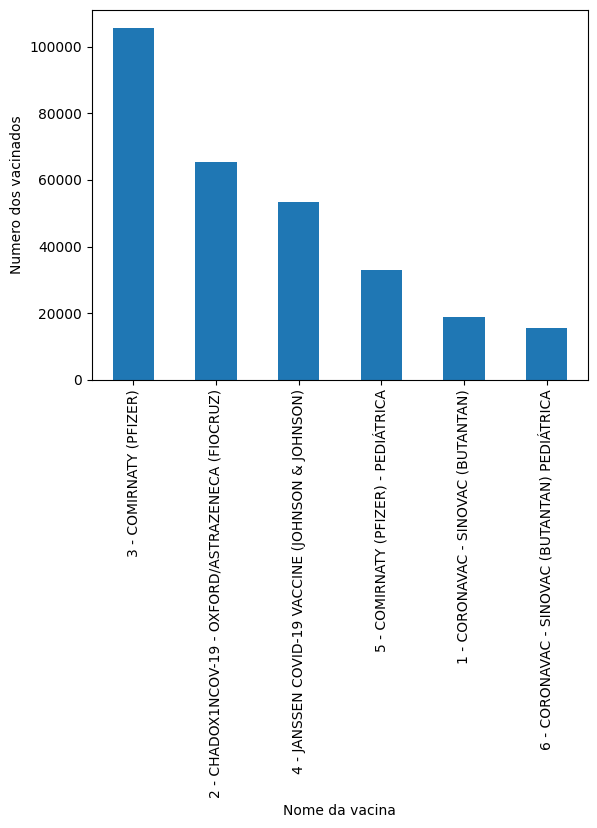

In [ ]:
vc_vacina = vc.vacina_fabricante.value_counts()
vc_vacina.plot(kind='bar')
plt.xlabel('Nome da vacina')
plt.ylabel('Numero dos vacinados')
plt.show()

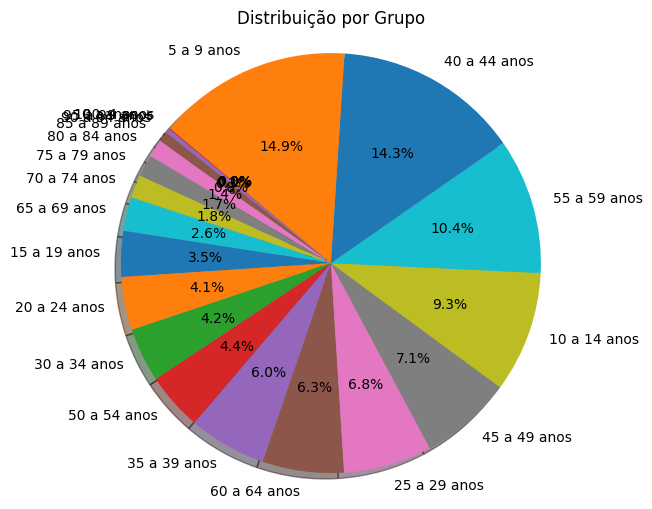

In [55]:
conn = sqlite3.connect('vacinados.db')

cursor = conn.cursor()
cursor.execute("SELECT faixa_etaria, COUNT(*) FROM vacinados GROUP BY faixa_etaria order by count(*)")
dados = cursor.fetchall()

# Fechar a conexão com o banco de dados
conn.close()

labels = [registro[0] for registro in dados]
sizes = [registro[1] for registro in dados]


# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Garante que o gráfico de pizza seja desenhado como um círculo
plt.title('Distribuição por Grupo')

# Mostrar o gráfico
plt.show()

In [ ]:
total_ocorrencias = sum([ocorrencias for _, ocorrencias in dados])

# Calcular as porcentagens para cada município
faixa_porcentagens = [(faixa_etaria, (ocorrencias / total_ocorrencias) * 100) for faixa_etaria, ocorrencias in dados]

# Mostrar os resultados
for faixa_etaria, porcentagem in faixa_porcentagens:
    print(f"{faixa_etaria}: {porcentagem:f}%")

118: 0.000333%
117: 0.000333%
116: 0.000333%
115: 0.000333%
114: 0.000667%
113: 0.000333%
111: 0.000333%
110: 0.000333%
108: 0.000333%
107: 0.000333%
105: 0.001667%
104: 0.001333%
103: 0.001333%
102: 0.001333%
101: 0.005333%
100: 0.004667%
99: 0.007667%
98: 0.015333%
97: 0.020667%
96: 0.022000%
95: 0.032000%
94: 0.040667%
93: 0.053000%
92: 0.062333%
91: 0.076333%
90: 0.092000%
89: 0.126333%
88: 0.126667%
87: 0.164000%
86: 0.178333%
85: 0.193333%
84: 0.220333%
83: 0.255000%
82: 0.276667%
81: 0.294333%
80: 0.331333%
79: 0.309333%
78: 0.315667%
77: 0.344333%
76: 0.353333%
75: 0.354000%
74: 0.357667%
73: 0.376333%
72: 0.363333%
71: 0.344000%
70: 0.327333%
69: 0.384000%
68: 0.473000%
67: 0.526667%
66: 0.562667%
65: 0.652333%
64: 0.869667%
63: 1.015000%
62: 1.188000%
61: 1.319333%
60: 1.875667%
59: 2.128333%
58: 2.108333%
57: 2.166333%
56: 2.126333%
55: 1.898333%
54: 1.482667%
53: 1.047333%
52: 0.754667%
51: 0.601333%
50: 0.554667%
49: 0.605667%
48: 0.809000%
47: 1.272667%
46: 1.881000%
45: 

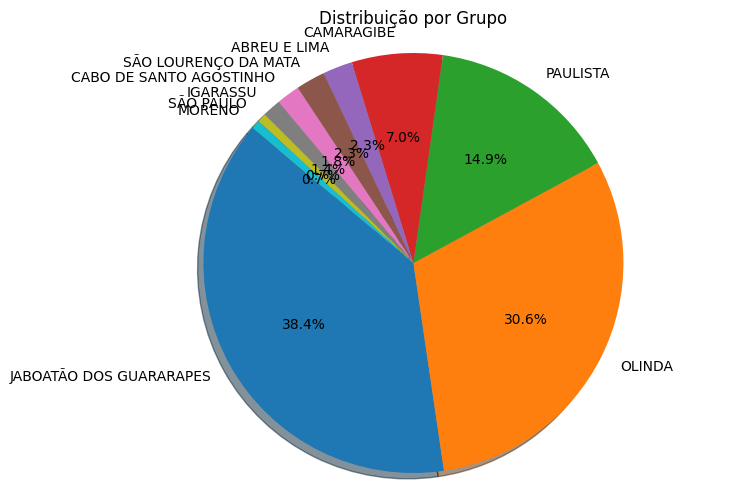

In [ ]:
conn = sqlite3.connect('vacinados.db')

cursor = conn.cursor()
cursor.execute("SELECT municipio, COUNT(*) FROM vacinados where municipio not like '%recife%' GROUP BY municipio ORDER BY COUNT(*) desc limit 10")
dados = cursor.fetchall()

# Fechar a conexão com o banco de dados
conn.close()

labels = [registro[0] for registro in dados]
sizes = [registro[1] for registro in dados]


# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Garante que o gráfico de pizza seja desenhado como um círculo
plt.title('Distribuição por Grupo')

# Mostrar o gráfico
plt.show()

In [ ]:
total_ocorrencias = sum([ocorrencias for _, ocorrencias in dados])

# Calcular as porcentagens para cada município
municipios_porcentagens = [(municipio, (ocorrencias / total_ocorrencias) * 100) for municipio, ocorrencias in dados]

# Mostrar os resultados
for municipio, porcentagem in municipios_porcentagens:
    print(f"{municipio}: {porcentagem:.2f}%")

JABOATÃO DOS GUARARAPES: 38.43%
OLINDA: 30.58%
PAULISTA: 14.86%
CAMARAGIBE: 6.99%
ABREU E LIMA: 2.29%
SÃO LOURENÇO DA MATA: 2.25%
CABO DE SANTO AGOSTINHO: 1.80%
IGARASSU: 1.42%
SÃO PAULO: 0.69%
MORENO: 0.68%


<Axes: xlabel='sexo'>

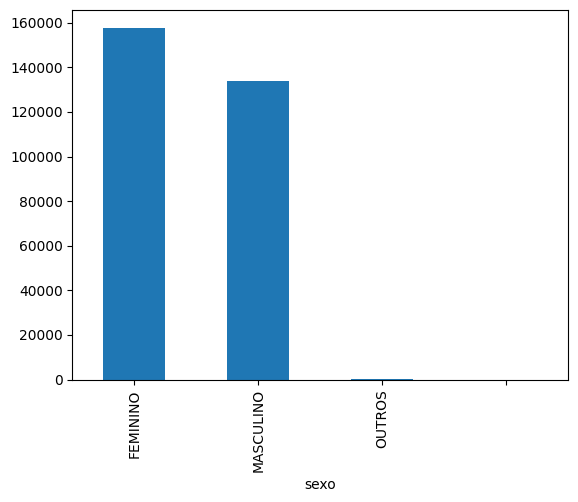

In [ ]:
vc_sexo = vc.sexo.value_counts()
vc_sexo.plot(kind='bar')

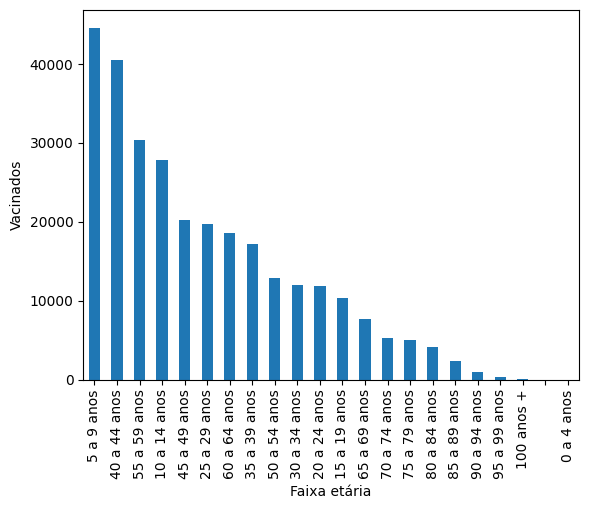

In [ ]:
vc_idade = vc.faixa_etaria.value_counts()
vc_idade.plot(kind='bar')
plt.xlabel('Faixa etária')
plt.ylabel('Vacinados')
plt.show()

In [ ]:


def get_vacinados_data():
    conn = sqlite3.connect('vacinados.db')
    query = "SELECT data_vacinacao FROM vacinados"
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

def print_vacinados_por_mes_ano():
    df = get_vacinados_data()

    # Converter a coluna 'data_vacinacao' para o formato datetime
    df['data_vacinacao'] = pd.to_datetime(df['data_vacinacao'])

    # Extrair o mês e o ano
    df['mes_ano'] = df['data_vacinacao'].dt.to_period('M')

    # Contar o número de vacinados por mês e ano
    vacinados_por_mes_ano = df['mes_ano'].value_counts().sort_index()

    # Imprimir o número de vacinados por mês
    print("Número de Vacinados por Mês e Ano:")
    for mes_ano, num_vacinados in vacinados_por_mes_ano.items():
        print(f"{mes_ano}: {num_vacinados}")

print_vacinados_por_mes_ano()


Número de Vacinados por Mês e Ano:
2022-01: 237042
2022-02: 217488
2022-03: 190392
2022-04: 50823
2022-05: 17394
2022-06: 44655
2022-07: 65130
2022-08: 23982
2022-09: 11856
2022-10: 6672
2022-11: 22359
2022-12: 12207


In [ ]:
def get_vacinados_data():
    conn = sqlite3.connect('vacinados.db')
    query = "SELECT vacina_fabricante, descricao_dose, COUNT(*) as total FROM vacinados GROUP BY vacina_fabricante, descricao_dose"
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

def calcular_porcentagens_doses_por_vacina():
    df = get_vacinados_data()

    # Calcular a porcentagem de cada dose para cada vacina
    df['porcentagem'] = df.groupby('vacina_fabricante')['total'].transform(lambda x: (x / x.sum()) * 100)

    # Exibir as porcentagens
    print("Porcentagem de cada dose para cada vacina:")
    print(df)

calcular_porcentagens_doses_por_vacina()

Porcentagem de cada dose para cada vacina:
                                    vacina_fabricante  descricao_dose   total  \
0                  1 - CORONAVAC - SINOVAC (BUTANTAN)               1   34260   
1                  1 - CORONAVAC - SINOVAC (BUTANTAN)               2   22104   
2                  1 - CORONAVAC - SINOVAC (BUTANTAN)               3     450   
3                  1 - CORONAVAC - SINOVAC (BUTANTAN)               4     168   
4   2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)               1   10410   
5   2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)               2    8613   
6   2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)               3   85887   
7   2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)               4   98919   
8   2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)               5      36   
9                              3 - COMIRNATY (PFIZER)               1   19866   
10                             3 - COMIRNATY (PFIZER)             

In [ ]:
import sqlite3
import pandas as pd

# Conectar ao banco de dados SQLite
conn = sqlite3.connect('vacinados.db')

# Consulta SQL para obter os dados do banco de dados dentro do período de janeiro a março
sql_query = """
SELECT sexo, COUNT(*) as total
FROM vacinados
WHERE strftime('%m', data_vacinacao) BETWEEN '10' AND '12'
GROUP BY sexo
"""

# Ler os dados do banco de dados para um DataFrame do Pandas
df = pd.read_sql_query(sql_query, conn)

# Calcular a porcentagem de vacinados por sexo
total_vacinados = df['total'].sum()
df['porcentagem'] = (df['total'] / total_vacinados) * 100

# Exibir as porcentagens
print("Porcentagem de vacinados por sexo no período de janeiro a março:")
for index, row in df.iterrows():
    print(f"{row['sexo']}: {row['porcentagem']:.2f}%")

# Fechar a conexão com o banco de dados
conn.close()


Porcentagem de vacinados por sexo no período de janeiro a março:
: 0.01%
FEMININO: 58.93%
MASCULINO: 40.91%
OUTROS: 0.15%


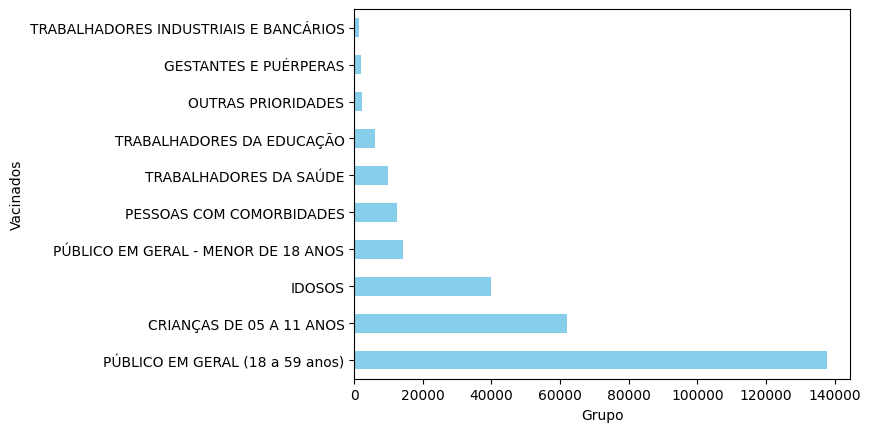

In [ ]:
vc_grupo = vc.grupo.value_counts().head(10)
vc_grupo.plot(kind='barh', color='skyblue')
plt.xlabel('Grupo')
plt.ylabel('Vacinados')
plt.show()

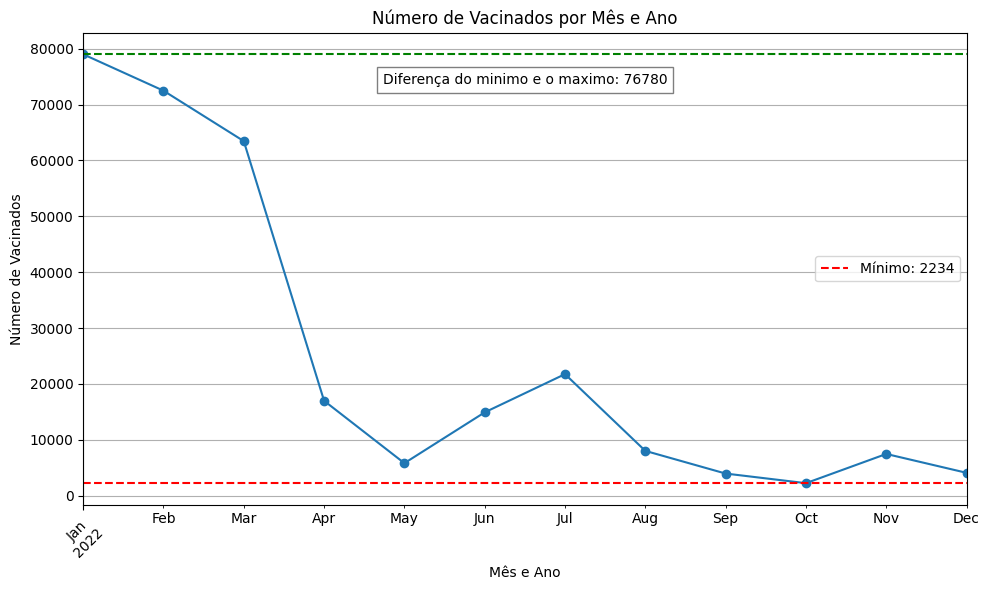

In [ ]:
def get_vacinados_data():
    conn = sqlite3.connect('vacinados.db')
    query = "SELECT data_vacinacao FROM vacinados"
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df
def plot_vacinados_por_mes_ano():
    df = get_vacinados_data()

    # Converter a coluna 'data_vacinacao' para o formato datetime
    df['data_vacinacao'] = pd.to_datetime(df['data_vacinacao'])

    # Extrair o mês e o ano
    df['mes_ano'] = df['data_vacinacao'].dt.to_period('M')

    # Agrupar por mês e ano e calcular a contagem de vacinados
    vacinados_por_mes_ano = df.groupby('mes_ano').size()

    # Plotar o gráfico
    plt.figure(figsize=(10, 6))
    vacinados_por_mes_ano.plot(kind='line', marker='o', linestyle='-')

    # Marcar o mínimo
    minimo = vacinados_por_mes_ano.min()
    plt.axhline(y=minimo, color='r', linestyle='--', label=f'Mínimo: {minimo}')
    plt.legend()

    maximo = vacinados_por_mes_ano.max()
    plt.axhline(y=maximo, color='g', linestyle='--', label=f'Máximo: {maximo}')
    diff = maximo - minimo

    # Adicionar texto indicando a diferença
    texto_diff = f'Diferença do minimo e o maximo: {diff}'
    plt.text(0.5, 0.9, texto_diff, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

    plt.title('Número de Vacinados por Mês e Ano')
    plt.xlabel('Mês e Ano')
    plt.ylabel('Número de Vacinados')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_vacinados_por_mes_ano()
